# Wine Quality Prediction
This notebook demonstrates a basic machine learning workflow to predict red wine quality.
**Goals:**  
- Load and explore the dataset  
- Clean and preprocess the data  
- Train and evaluate simple regression models  
- Summarize findings and suggest improvements


## 1. Project Objectives
1. Understand the relationship between physicochemical properties and wine quality  
2. Build simple regression models (Linear Regression, Decision Tree, Random Forest)  
3. Evaluate model performance using MAE and R²  
4. Identify which features most influence quality


## 2. Dataset Description
- **Source:** UCI Wine Quality dataset (red wines)  
- **Rows:** 1599 samples  
- **Columns:** 12 (11 physicochemical features + 1 quality score)  
  - fixed acidity, volatile acidity, citric acid, residual sugar, chlorides,  
    free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality  
- **Target:** ‘quality’ (score from 0–10)


## 3. Environment & Libraries
- **Python version:** 3.x  
- **Key packages:**
  - pandas (data manipulation)
  - numpy (numerical operations)
  - matplotlib, seaborn (visualization)
  - scikit-learn (modeling)


## 4. Load Data
In this section, we read the CSV file and take an initial look at its structure.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 5. Exploratory Data Analysis (EDA)
- Check for missing values and duplicates  
- View summary statistics  
- Visualize feature distributions and relationships with quality


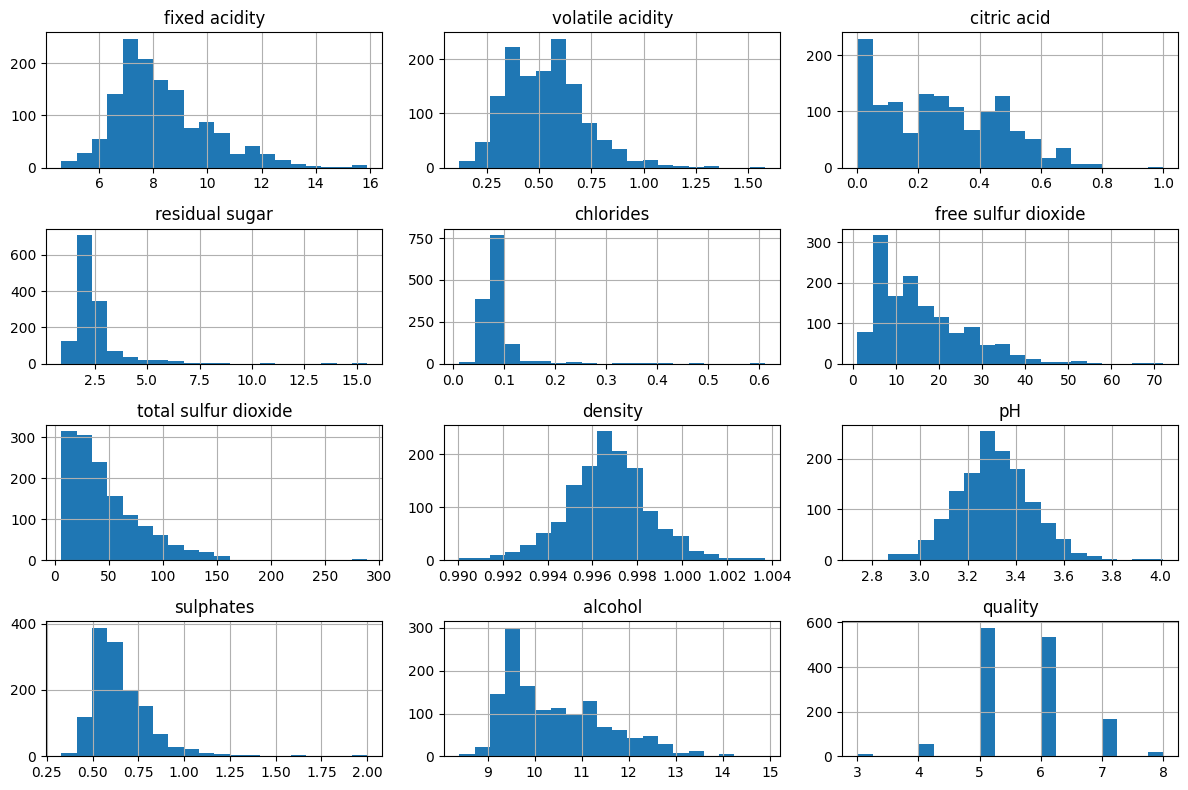

In [10]:
df.hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()

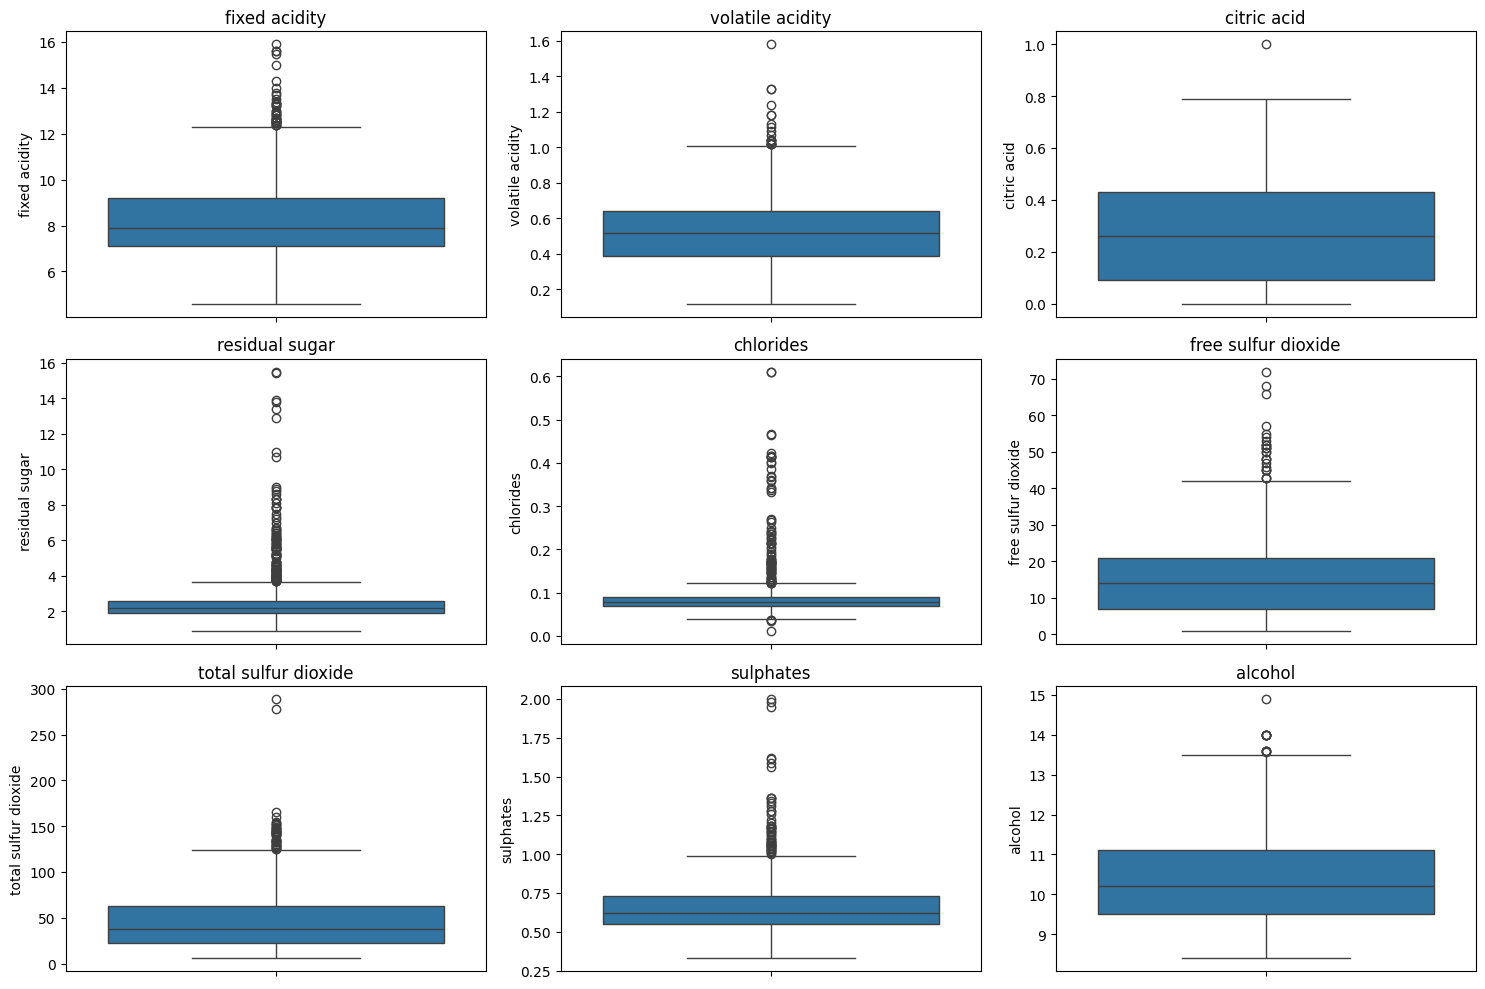

In [11]:
features = ['fixed acidity', 'volatile acidity', 'citric acid',
            'residual sugar', 'chlorides', 'free sulfur dioxide',
            'total sulfur dioxide', 'sulphates', 'alcohol']

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(data=df, y=feature, ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()

<Axes: >

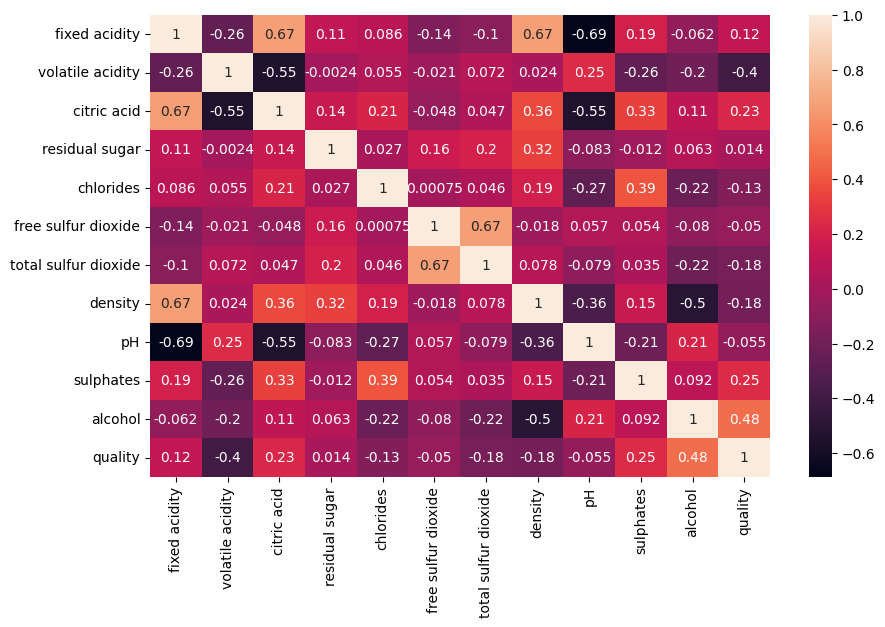

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(), annot=True)

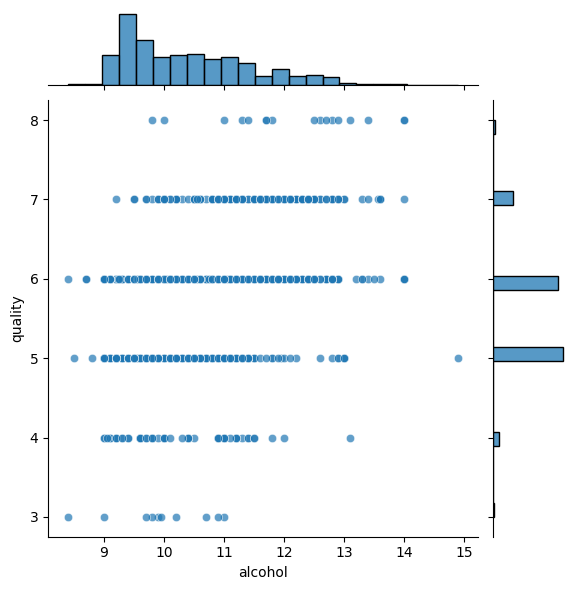

In [13]:
sns.jointplot(data=df, x='alcohol', y='quality', alpha=0.7)

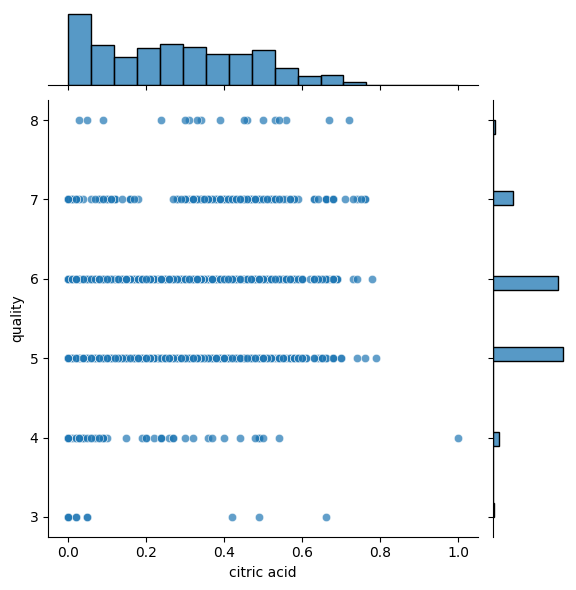

In [14]:
sns.jointplot(data=df, x='citric acid', y='quality', alpha=0.7)

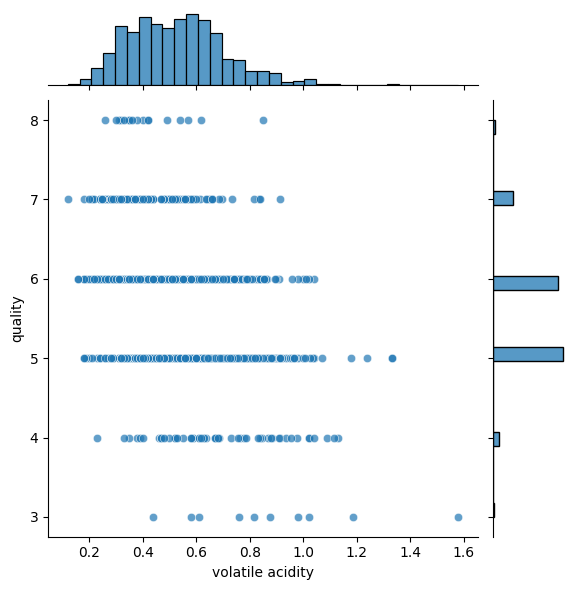

In [15]:
sns.jointplot(data=df, x='volatile acidity', y='quality', alpha=0.7)

## 6. Data Preprocessing
- Remove duplicate rows  
- Handle missing values (none in this dataset)  
- (Optional) Scale features before modeling


In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [1]:
int(df.duplicated().sum())

NameError: name 'df' is not defined

In [2]:
df = df.drop_duplicates()

NameError: name 'df' is not defined

## 7. Feature & Target Definition
- **Features (X):** All columns except `quality`  
- **Target (y):** `quality`


In [3]:
x = df.drop('quality', axis=1)
y = df['quality']

NameError: name 'df' is not defined

## 8. Train/Test Split
We split data into 75% training and 25% testing to evaluate generalization.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

NameError: name 'train_test_split' is not defined

## 9. Modeling & Evaluation
We train three models:
1. Linear Regression  
2. Decision Tree Regressor  
3. Random Forest Regressor  
Evaluate each using Mean Absolute Error (MAE) and R².


In [17]:
linear_model = LinearRegression()

In [18]:
linear_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
y_pred = linear_model.predict(x_test)

In [20]:
print('mae: ',mean_absolute_error(y_test, y_pred))
print('mse: ',mean_squared_error(y_test, y_pred))
print('r2: ',r2_score(y_test, y_pred))

mae:  0.521694427733226
mse:  0.44240908799955736
r2:  0.3547177428491365


In [21]:
Tree_model = DecisionTreeRegressor()

In [22]:
Tree_model.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [23]:
y_pred = Tree_model.predict(x_test)

In [24]:
print('mae: ',mean_absolute_error(y_test, y_pred))
print('mse: ',mean_squared_error(y_test, y_pred))
print('r2: ',r2_score(y_test, y_pred))

mae:  0.5911764705882353
mse:  0.7852941176470588
r2:  -0.14540224083981035


In [25]:
params = {
  'max_depth': [3, 5, 7, None],
  'min_samples_leaf': [1, 5, 10],
  'min_samples_split': [2, 10, 20]
}

In [26]:
grid = GridSearchCV(DecisionTreeRegressor(), params, scoring='r2')

In [27]:
grid.fit(x_train, y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 5, ...], 'min_samples_split': [2, 10, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [28]:
print(grid.best_params_, grid.best_score_)

{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10} 0.2634376690468464


In [29]:
Tree_model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=10)

In [30]:
Tree_model.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [31]:
y_pred = Tree_model.predict(x_test)

In [32]:
print('mae: ',mean_absolute_error(y_test, y_pred))
print('mse: ',mean_squared_error(y_test, y_pred))
print('r2: ',r2_score(y_test, y_pred))

mae:  0.5510484822342268
mse:  0.4862298190433595
r2:  0.29080237355642025


In [33]:
Rf_model = RandomForestRegressor(n_estimators=300)

In [34]:
Rf_model.fit(x_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
y_pred = Rf_model.predict(x_test)

In [36]:
print('mae: ',mean_absolute_error(y_test, y_pred))
print('mse: ',mean_squared_error(y_test, y_pred))
print('r2: ',r2_score(y_test, y_pred))

mae:  0.5100980392156863
mse:  0.4193137254901961
r2:  0.38840382221324987


## 10. Results Summary
| Model                 | MAE    | R²       |
|-----------------------|--------|----------|
| Linear Regression     | 0.521  | 0.354    |
| Decision Tree         | 0.551  | 0.290    |
| Random Forest         | 0.510  | 0.388    |

**Key takeaway:** Random Forest performed best, reducing MAE by 0.11 compared to linear regression.


## 11. Conclusion & Next Steps
- **Conclusion:** The Random Forest model achieved the lowest MAE and highest R².  
- **Next steps:**  
  1. Hyperparameter tuning with GridSearchCV or RandomizedSearchCV  
  2. Add feature engineering (e.g., SO₂ ratio)  
  3. Visualize residuals and learning curves  
